<img src="./imagenes/logoucm.png" style="height: 100px">
<center style="color:#888">Aprendizaje automático: MACH<br/></center>
<center style="color:#888">Alicia Mayorga Caballero<br/></center>

<h1><center>HOUSE PRICE PREDICTION</center></h1>

# Objetivo y selección de dataset

Vamos a realizar un estudio con el objetivo de crear modelos para <u>predecir el precio de la vivienda</u> en King County, Washington State, EE.UU. Para ello haremos uso del dataset ficticio [kc_house_data](https://www.kaggle.com/datasets/shivachandel/kc-house-data), disponible en Kaggle.

Nuestros objetivos son poder predecir las ventas de las viviendas, entender que factores influyen en precios más altos...

# 0. Importación de archivos

In [1]:
 from codigos.explore_data import *
from codigos.preprocessing import *
from codigos.modeling import *


%matplotlib inline

In [2]:
from IPython.core.display import HTML # para alinear plots
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# 1. Exploración de los datos

Primero veamos como son nuestros datos. Para ello utilizaremos la función definida `explore_data()`.

In [3]:
df = explore_data("./data/kc_house_data.csv")

Mostramos todas las columnas de las primeras 10 filas del dataframe:


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


--------------------------------------------------
Tamaño del dataframe:
Número de filas: 21613
Número de columnas: 21
--------------------------------------------------
Información de las columnas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-nu

None

--------------------------------------------------
Valores nulos:


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

--------------------------------------------------


In [3]:
# Creamos un mapa centrado en la ubicación de interés
mapa = folium.Map(location=[df["lat"].mean(), df["long"].mean()], zoom_start=10)

# Creamos una capa de calor utilizando la función HeatMap de folium
datos_mapa = df[["lat", "long"]].values.tolist()
heatmap = HeatMap(data=datos_mapa, radius=10)

# Añadimos la capa de calor al mapa
heatmap.add_to(mapa)

# Mostramos el mapa
mapa

Podemos empezar eliminando las variables 'id', 'date' como primera limpieza.

In [4]:
df = df.drop(["id","date"], axis = 1)

Veamos que valores o rango de valores toman nuestras variables con la función `levels()`.

In [5]:
niveles(df)

     variable                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

<div style="background-color:#EBF5FB; padding:10px">
<p style="color:#000000">En principio empezaremos a trabajar con todas las variables, aunque durante nuesttro análisis exploratorio se analizarán posible nuevas eliminaciones. De manera que nuestro dataset contiene las siguientes <strong>variables de segmentación</strong>:
    
* _bedrooms_: Número de habitaciones
* _bathrooms_: Número de baños
* _floors_: Número de pisos
* _waterfront_: Rango del trabajador (binaria)
* _view_: (categórica de 0-4)
* _condition_: (categórica de 1-5)
* _grade_: Variable que toma valores {1,3,4,5,6,7,8,9,10,11,12,13}

    Las <strong>variables de modelización</strong>:
* _sqft_living_: Pies cuadrados habitables
* _sqft_lot_: Area total del solar en pies cuadrados
* _sqft_above_
* _sqft_basement_ 
* _yr_built_: Año de contrucción
* _yr_renovated_: Último año de renovación
* _zipcode_: Código postal
* _sqft_living15_ 
* _sqft_lot15_

    Y la <strong>variable target</strong>:
* _price_: precio de la vivienda</p>
</div>

## 1.1 Análisis descriptivo

Realizamos un breve descriptivo con la función `describe_data()`.

Mostramos una tabla con los principales estadísticos:


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.0000,21613.0000,21613.0000,21613.0000,21613.0000,21613.0000,21613.0000,21613.0000,21613.0000,21613.0000,21613.0000,21613.0000,21613.0000,21613.0000,21613.0000,21613.0000,21613.0000,21613.0000,21613.0000
mean,540088.1418,3.3708,2.1148,2079.8997,15106.9676,1.4943,0.0075,0.2343,3.4094,7.6569,1788.3907,291.5090,1971.0051,84.4023,98077.9398,47.5601,-122.2139,1986.5525,12768.4557
std,367127.1965,0.9301,0.7702,918.4409,41420.5115,0.5400,0.0865,0.7663,0.6507,1.1755,828.0910,442.5750,29.3734,401.6792,53.5050,0.1386,0.1408,685.3913,27304.1796
min,75000.0000,0.0000,0.0000,290.0000,520.0000,1.0000,0.0000,0.0000,1.0000,1.0000,290.0000,0.0000,1900.0000,0.0000,98001.0000,47.1559,-122.5190,399.0000,651.0000
25%,321950.0000,3.0000,1.7500,1427.0000,5040.0000,1.0000,0.0000,0.0000,3.0000,7.0000,1190.0000,0.0000,1951.0000,0.0000,98033.0000,47.4710,-122.3280,1490.0000,5100.0000
50%,450000.0000,3.0000,2.2500,1910.0000,7618.0000,1.5000,0.0000,0.0000,3.0000,7.0000,1560.0000,0.0000,1975.0000,0.0000,98065.0000,47.5718,-122.2300,1840.0000,7620.0000
75%,645000.0000,4.0000,2.5000,2550.0000,10688.0000,2.0000,0.0000,0.0000,4.0000,8.0000,2210.0000,560.0000,1997.0000,0.0000,98118.0000,47.6780,-122.1250,2360.0000,10083.0000
max,7700000.0000,33.0000,8.0000,13540.0000,1651359.0000,3.5000,1.0000,4.0000,5.0000,13.0000,9410.0000,4820.0000,2015.0000,2015.0000,98199.0000,47.7776,-121.3150,6210.0000,871200.0000


--------------------------------------------------
Y realizamos unos histogramas sobre todo el conjunto de datos:


<AxesSubplot:>

--------------------------------------------------


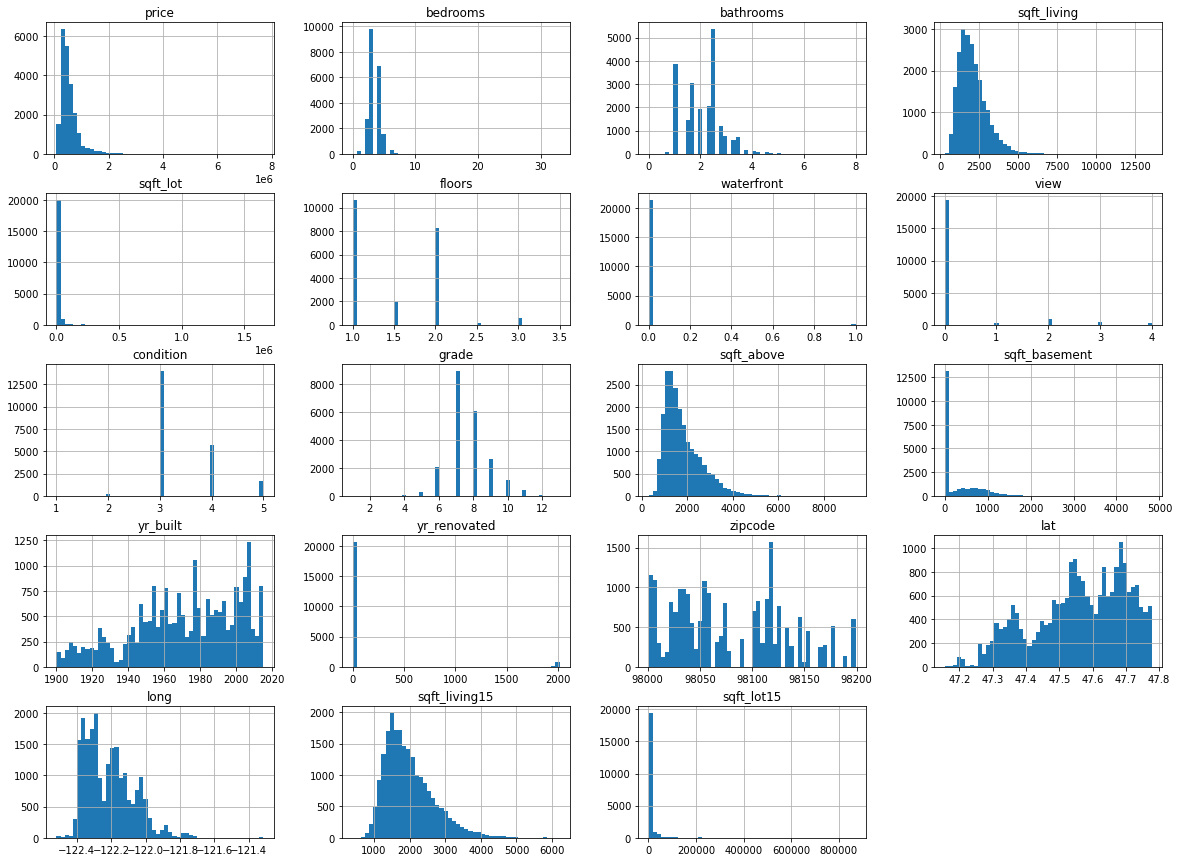

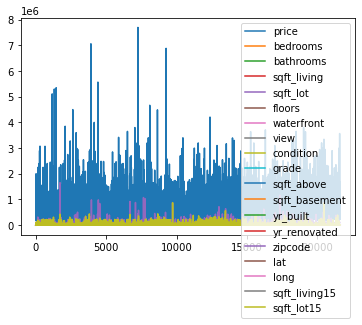

In [6]:
describe_data(df)

<div style="background-color:#EBF5FB; padding:10px">
<p style="color:#000000">Con todo esto, cabe destacar:
    
* El rango de precios que va desde 75.000 a 7700000. Además, la mediana se situa en 450.000. Esto es una prueba más de que la media en estos ámbitos no suele ser nada representativa de la población.
* Llama la atención que el mínimo de habitaciones sea 0, habría que investigar las observaciones con esa característica para entender mejor este valor.
* Destacamos también la gran varianza en las variables 'sqft_living', 'sqft_lot',... Más tarde deberemos estandarizar dichas variables.
* En cuanto a número de pisos la media y la mediana si que son muy próximas a 1.5</p>
</div>

Realicemos también algunos gráficos para entender mejor nuestra variable target usando nuestra función creada `graphic_data()`.

Price en función de view:


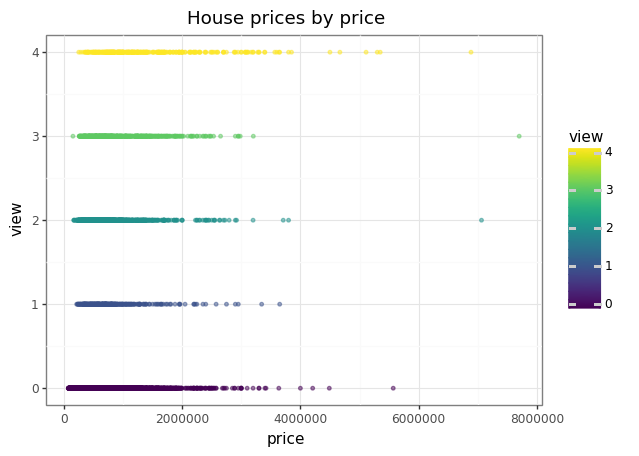

<ggplot: (142078016546)>

--------------------------------------------------
Price en función de bathrooms:


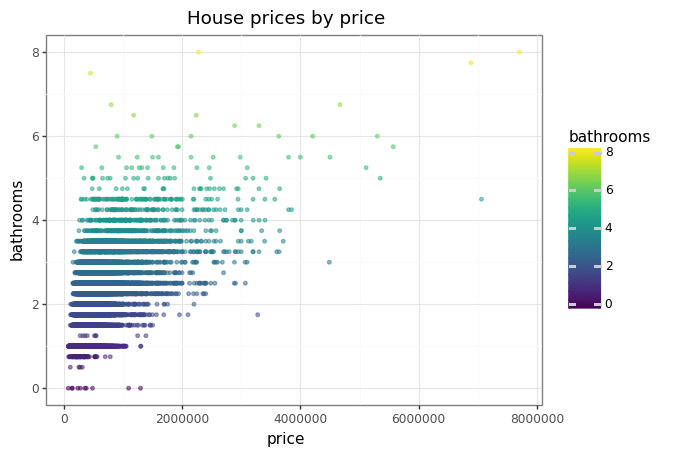

<ggplot: (142078011730)>

--------------------------------------------------
Segmentacion por waterfront:


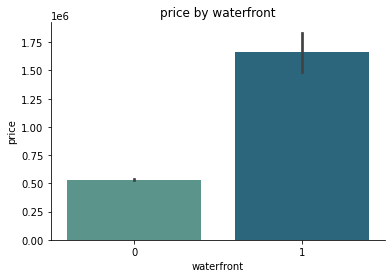

--------------------------------------------------
Segmentacion por grade:


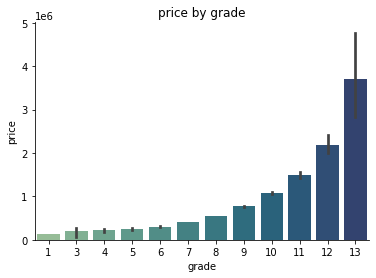

--------------------------------------------------


In [7]:
graphic_data(df)

## 1.2 Tratamiento de outliers

Utilizaremos dos funciones, una para ver outliers unidimensionales `outliers1()` y otra para multidimensionales `outliers2()`.

Boxplot de price:


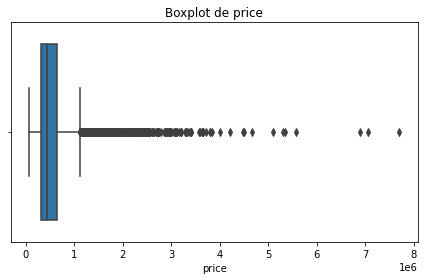

--------------------------------------------------
Boxplot de yr_built:


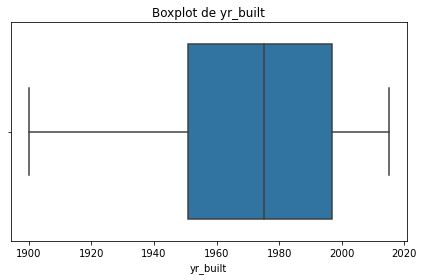

--------------------------------------------------
Boxplot de sqft_above:


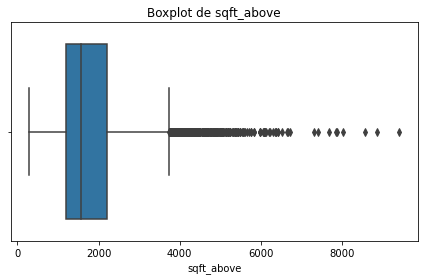

--------------------------------------------------
Boxplot de bathrooms:


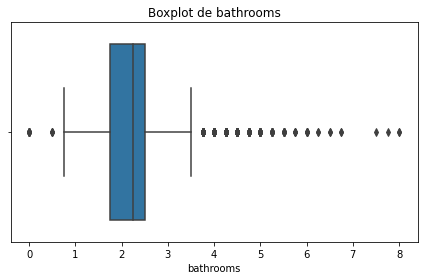

--------------------------------------------------


In [8]:
outliers1(df)          # unidimensionales

Boxplot de price en funcion de grade:


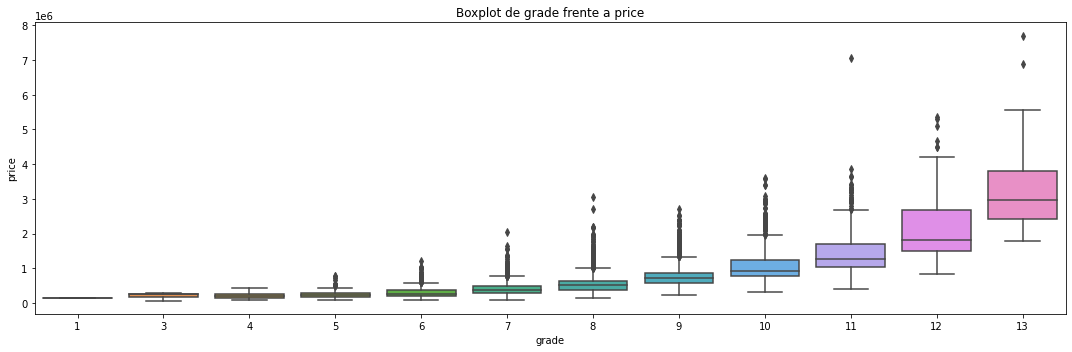

--------------------------------------------------
Boxplot de price en funcion de condition:


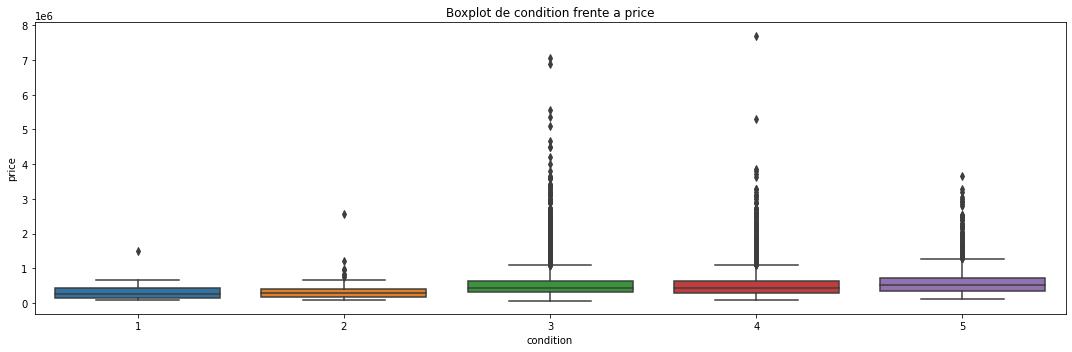

--------------------------------------------------
Boxplot de price en funcion de floors:


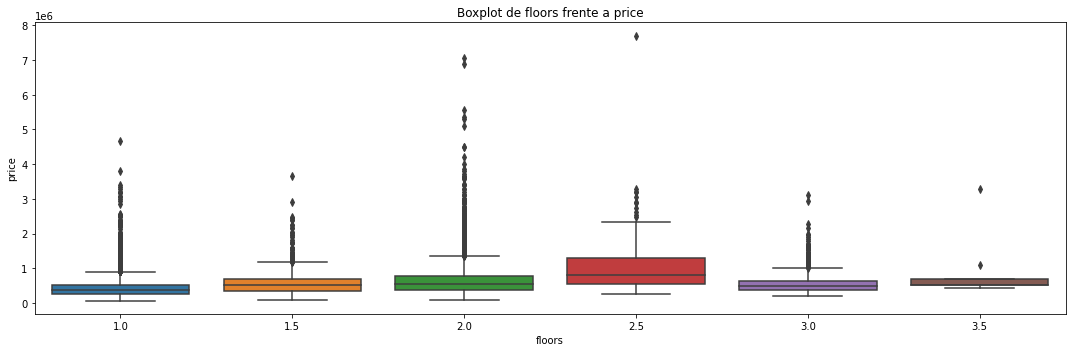

--------------------------------------------------


In [9]:
outliers2(df)          # multidimensionales

<div style="background-color:#EBF5FB; padding:10px">
<p style="color:#000000">
Después de estas visualizaciones pasamos a la detección propia de los outliers.
    
En la variable price después de todo nuestro análisis exploratorio no podemos decir que esos posibles outliers realmente lo sean. Puesto que un outlier suele ser un dato muy alejado del resto suele deberse a una mala recogida de datos, transcripción,etc.

En nuestro caso, consideraremos de interés esta disparidad, puesto que los precios altos probablemente tendrán mucha relación con el lugar donde se encuentre la vivienda u otros factores que pueden ser interesantes en nuestro estudio de predicción. En problemas de predicción como el que abordaremos precios altos pueden ser debido a características importantes a tener en cuenta.</p>
</div>

## 1.3 Feature engineering

<div style="background-color:#EBF5FB; padding:10px">
<p style="color:#000000">
    El <strong>feature engineering</strong> tiene como objetivo explorar más el conjunto de datos en búsqueda de patrones o nuevas variables que nos ayuden a mejorar la precisión del modelo. En nuestro caso vamos a crear nuevas variables que representen,

* Relación entre el área construida y el tamaño del terreno.
* Edad de la casa en el momento de la venta.
* Frecuencia respecto a la variable 'view'.
* Distancia de la casa al centro de la ciudad.

Y realizaremos un One-Hot Encoding a las variables categóricas 'condition' y 'view'.
</p>
</div>

Usamos la función `feature_eng()` aplicada a nuestro dataframe.

In [10]:
df = feature_eng(df)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_ratio,age,condition_1,condition_2,condition_3,condition_4,condition_5,view_0,view_1,view_2,view_3,view_4,view_freq,distance_to_seattle
0,221900.0000,3,1.0000,1180,5650,1.0000,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.2570,1340,5650,0.2088,2015,0,0,1,0,0,1,0,0,0,0,0.9017,11.9794
1,538000.0000,3,2.2500,2570,7242,2.0000,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.3190,1690,7639,0.3549,24,0,0,1,0,0,1,0,0,0,0,0.9017,12.8018
2,180000.0000,2,1.0000,770,10000,1.0000,0,0,3,6,770,0,1933,0,98028,47.7379,-122.2330,2720,8062,0.0770,2015,0,0,1,0,0,1,0,0,0,0,0.9017,16.4256
3,604000.0000,4,3.0000,1960,5000,1.0000,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.3930,1360,5000,0.3920,2015,0,0,0,0,1,1,0,0,0,0,0.9017,10.5431
4,510000.0000,3,2.0000,1680,8080,1.0000,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.0450,1800,7503,0.2079,2015,0,0,1,0,0,1,0,0,0,0,0.9017,21.6174


## 1.4 Análisis de correlaciones

En un inicio hemos cogido variables que estaban relacionadas o que podían influir en el objetivo del estudio. Sin embargo, en esta recolección no se ha tenido en cuenta la posible redundancia de las mismas. Para solucionar esto, analizaremos las correlaciones entre las variables.

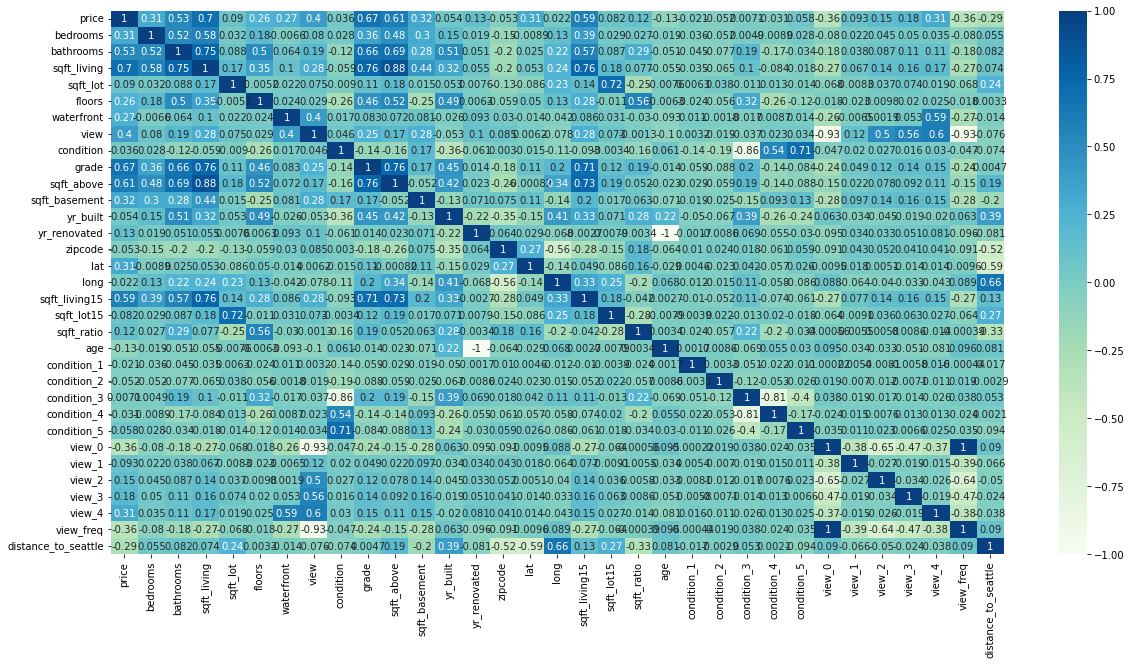

In [11]:
corr(df)

Podemos observar que existe un grupo de variables altamente correladas. Por tanto, podemos prescindir de las variables *bathrooms* y *sqft_living*.

In [12]:
df=df.drop(['bathrooms','sqft_living'],axis=1)

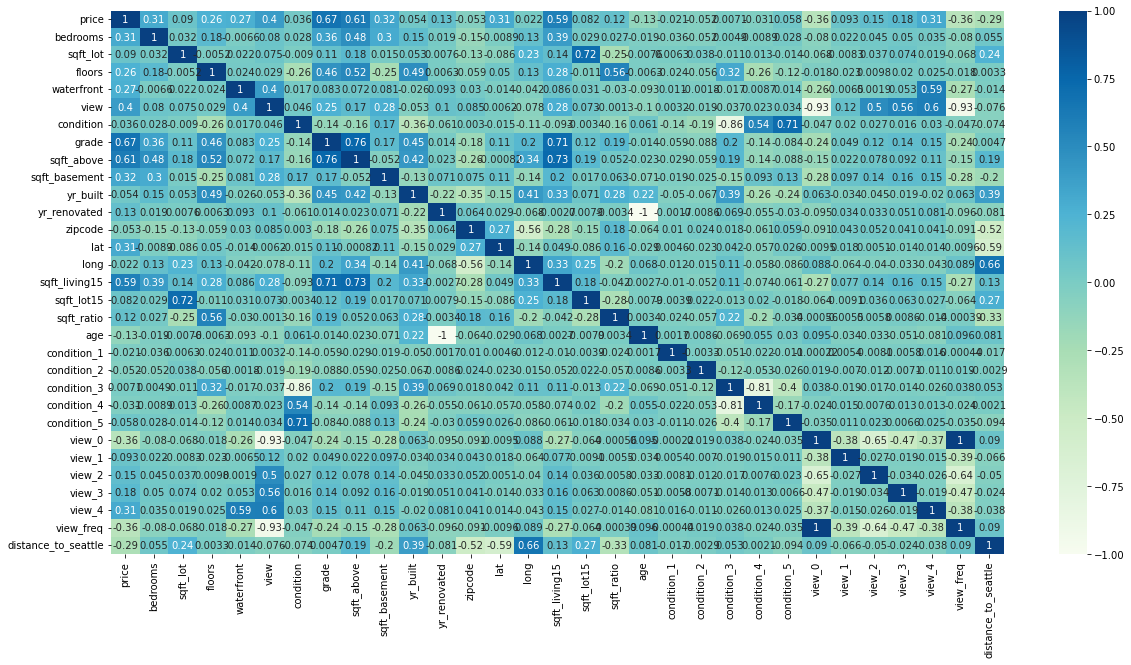

In [13]:
corr(df)

Quitamos más variables con correlaciones altas.

In [14]:
df=df.drop(['grade','sqft_above','sqft_lot', 'lat','long'],axis=1)

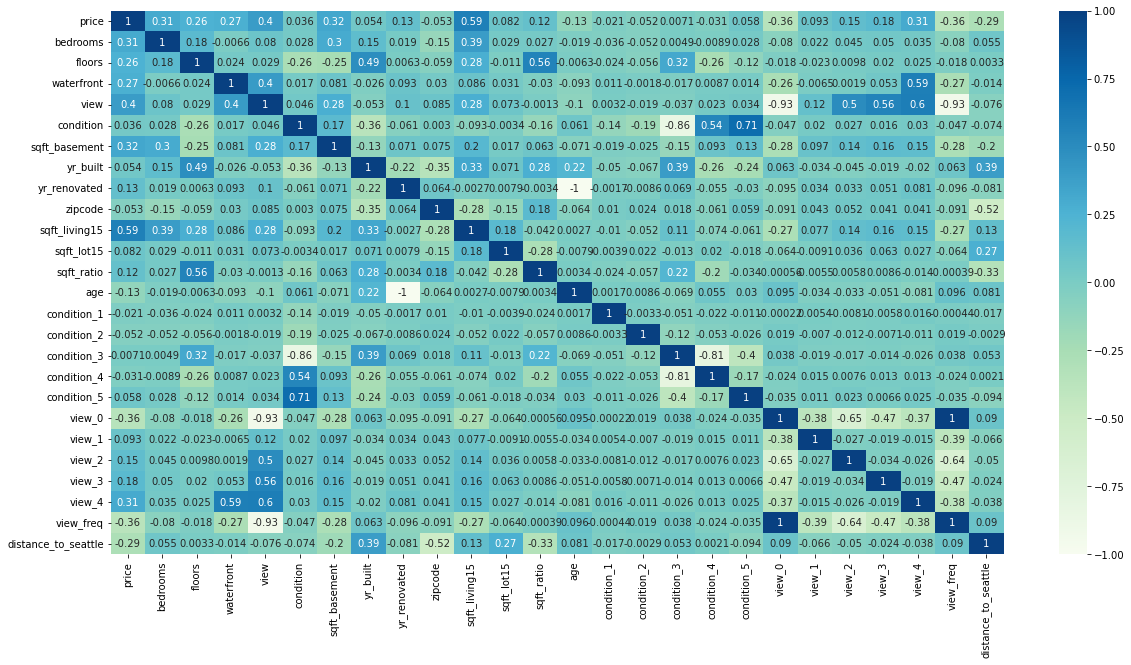

In [15]:
corr(df)

Vemos que hemos quitado las variables con las correlaciones más fuertes.

## 1.5 Normalidad

La hipótesis de normalidad es una hipótesis esencial a la hora de realizar una regresión, por tanto, veamos si nuestra variable objetivo 'price' es normal.

Nos ayudaremos de gráficos para determinar si existe o no normalidad con `grafico_norm()`.

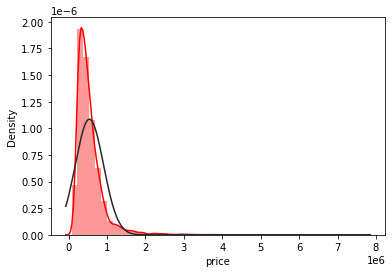

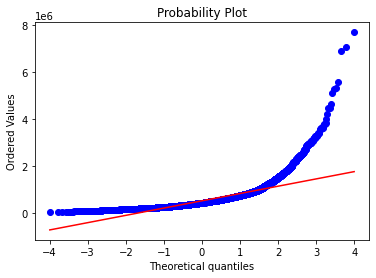

In [16]:
grafico_norm(df, 'price')

Al no tener normalidad vamos a aplicar una transformación logarítmica.

In [17]:
df['price'] = np.log1p(df['price'])

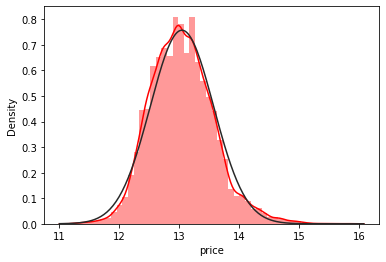

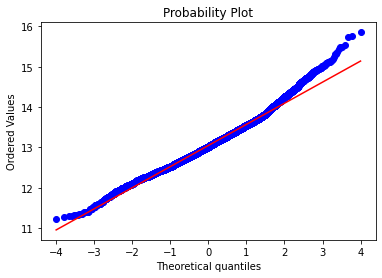

In [18]:
grafico_norm(df, 'price')

Vemos que hemos arreglado la normalidad y, por tanto, podemos proceder con el ajuste de modelos.

## 1.6 Preparación y division del conjunto de datos

Para poder dividir nuestros datos tendremos que generar una matriz X con todas la variables menos la variable target, que guardaremos en un vector y aparte. Además antes se deben estandarizar las variables, `estandar()`. Con esos dos elementos podremos realizar la división de los datos. Usaremos nuestra función definida `preparacion()`

In [19]:
df = estandar(df)

In [20]:
df, X, y, X_train, X_test, y_train, y_test = preparacion(df)

# 2. Ajuste de modelos

## 2.1 XGBoost

Puesto que seguimos teniendo muchas variables, vamos a ajustar un primer modelo (que, de hecho, es el que mejor resultados da), vamos a ver el gráfico de importancia de características y quitaremos las que menos aporten. De esta manera reduciremos tiempos de los próximos modelos cuyo tiempo se irá incrementando.

Vamos a utilizar el XGBoost para la reducción de variables. Esto se hará utilizando la función definida `XGB()`.

MSE: 0.14
RMSE: 0.38
R2: 0.85
MAE: 0.27


(0.1442251241892574,
 0.37976983054115476,
 0.854870171294723,
 0.2715312232386838)

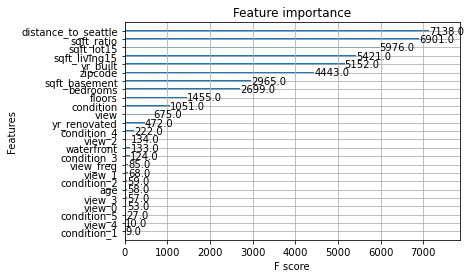

In [21]:
XGB(df, X, y, X_train, y_train, X_test, y_test)

Vemos que las variables más influyentes en el precio de una vivienda son:
* La más importante en nuestra variable creada 'distance_to_seattle', que es la distancia de la vivienda a Seattle.
* La segunda más importante es la variable creada sqft_ratio, recordando que es la relación entre el área construida y el área del terreno.
* Otras características importantes son yr_built y el zicode.
* Vemos que ninguna de nuestras variables codificadas de condition y view aportan poco al modelo.

Concluimos que los aspectos más importantes son la **localización** y los **metros cuadrados**.

## 2.1.1 Reducción de variables

Eliminamos las primeras variables que menos aportan al modelo.

In [22]:
df=df.drop(['condition_1','view_4','condition_5', 'view_0', 'view_3', 'age', 'condition_2', 'view_1', 'view_freq'],axis=1)

Volvemos a hacer uso de nuestra función `preparacion()`:

In [23]:
df, X, y, X_train, X_test, y_train, y_test = preparacion(df)

Ajustamos el modelo de nuevo con `XGB()` y nos guardamos las métricas.

MSE: 0.14
RMSE: 0.38
R2: 0.86
MAE: 0.27


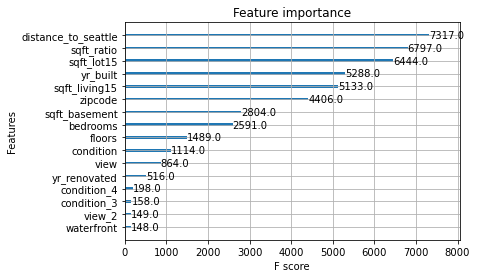

In [24]:
xgb_mse, xgb_rmse, xgb_r2, xgb_mae = XGB(df, X, y, X_train, y_train, X_test, y_test)

Vemos que con menos variables nuestro R2 ha mejorado y no ha supuesto un aumento de los errores.
Hemos mejorado el R2, pero debemos preguntarnos si nos conviene esta ligera mejora, ya que puede incurrir en un sobreajuste.

Para la práctica vamos a continuar con este modelo reducido

## 2.2 Regresión lineal

In [25]:
lin_mse, lin_rmse, lin_r2, lin_mae = reg_lin(X_train, y_train, X_test, y_test)

MSE: 0.33
RMSE: 0.58
R2: 0.67
MAE: 0.45


## 2.3 KNN

A partir de ahora vamos a ajustar el resto de modelos hiperparametrizando para asegurarnos obtener las mejores métricas.
Realizamos un knn con hiperparametrización con nuestra función `knn_h()`.

In [26]:
knn_mse, knn_rmse, knn_r2, knn_mae = KNN_h(X_train, y_train, X_test, y_test)

Mejores parámetros:  {'n_neighbors': 9}
Mejor puntuación de validación cruzada: 0.71
MSE: 0.29
RMSE: 0.54
R2: 0.71
MAE: 0.40


## 2.4 Árbol de decisión

Realizamos un arbol de decisión simple con hiperparametrización con la función `arbol_decision_h()`.

In [27]:
dt_mse, dt_rmse, dt_r2, dt_mae = arbol_decision_h(X_train, y_train, X_test, y_test)

Mejores parámetros:  {'max_depth': 15, 'min_samples_leaf': 16, 'min_samples_split': 10}
Mejor puntuación de validación cruzada: 0.72
MSE: 0.26
RMSE: 0.51
R2: 0.74
MAE: 0.37


## 2.5 Bagging

Recordemos que la idea de Bagging es crear un ensamble de modelos que trabajen juntos de menera que se mejore el rendimiento del modelo. En este caso, cada árbol se entrena y luego se combinan todas las predicciones. Este método nos puede ayudar a reducir el sobreajuste y a reducir la varianza.

Para ello usaremos la función definida `bagging_h()`.

<div style="background-color:#FCF3CF; padding:10px">
<p style="color:#000000">¡OJO! Ya empiezan a tardar más los modelos.</p>
</div>

In [28]:
bagging_mse, bagging_rmse, bagging_r2, bagging_mae = bagging_h(X_train, y_train, X_test, y_test)

Mejores parámetros:  {'base_estimator__max_depth': 15, 'base_estimator__min_samples_leaf': 2, 'base_estimator__min_samples_split': 10, 'n_estimators': 15}
Mejor puntuación de validación cruzada: 0.80
MSE: 0.20
RMSE: 0.44
R2: 0.80
MAE: 0.31


## 2.6 Random Forest

Un Random Forest es un método de ensamblaje de árboles de decisión combinados con bagging. La principal ventaja es su generalización que nos puede ayudar a evitar el sobreajuste propio de los arboles de decisión.

In [29]:
rf_mse, rf_rmse, rf_r2, rf_mae = random_forest(X_train, y_train, X_test, y_test)

Mejores parámetros:  {'max_depth': 30, 'max_features': 6, 'min_samples_split': 5, 'n_estimators': 300}
Mejor puntuación de validación cruzada: 0.81
MSE: 0.18
RMSE: 0.42
R2: 0.82
MAE: 0.30


## 2.7 Gradient Boost

In [30]:
gb_mse, gb_rmse, gb_r2, gb_mae = gradient_boost(X_train, y_train, X_test, y_test)

MSE: 0.15
RMSE: 0.38
R2: 0.85
MAE: 0.28


# 3 Conclusiones

Vamos a recoger en una tabla todas las métricas obtenidas para poder comparar mejor los modelos.

In [31]:
# Crear una lista de diccionarios con las métricas de cada modelo
metrics_list = [
    {'Model': 'XGBoost', 'MSE': xgb_mse, 'MAE': xgb_mae, 'RMSE': xgb_rmse, 'R2': xgb_r2},
    {'Model': 'Linear Regression', 'MSE': lin_mse, 'MAE': lin_mae, 'RMSE': lin_rmse, 'R2': lin_r2},
    {'Model': 'KNN', 'MSE': knn_mse, 'MAE': knn_mae, 'RMSE': knn_rmse, 'R2': knn_r2},
    {'Model': 'Decision Tree', 'MSE': dt_mse, 'MAE': dt_mae, 'RMSE': dt_rmse, 'R2': dt_r2},
    {'Model': 'Bagging', 'MSE': bagging_mse, 'MAE': bagging_mae, 'RMSE': bagging_rmse, 'R2': bagging_r2},
    {'Model': 'Random Forest', 'MSE': rf_mse, 'MAE': rf_mae, 'RMSE': rf_rmse, 'R2': rf_r2},
    {'Model': 'Gradient Boost', 'MSE': gb_mse, 'MAE': gb_mae, 'RMSE': gb_rmse, 'R2': gb_r2}#,
    
]

# Crear un DataFrame a partir de la lista de diccionarios
metrics_table = pd.DataFrame(metrics_list)

# Mostrar la tabla
metrics_table

,Model,MSE,MAE,RMSE,R2
0,XGBoost,0.1431,0.2712,0.3783,0.8560
1,Linear Regression,0.3318,0.4471,0.5761,0.6661
2,KNN,0.2870,0.3967,0.5357,0.7112
3,Decision Tree,0.2632,0.3704,0.5130,0.7352
4,Bagging,0.1958,0.3139,0.4425,0.8029
5,Random Forest,0.1798,0.3023,0.4240,0.8191
6,Gradient Boost,0.1468,0.2750,0.3832,0.8522


Ordenemos la tabla según las métricas para ver en cada una cual es el mejor modelo.

In [32]:
orden_metricas(metrics_table)

MSE de menor a mayor :


,Model,MSE,MAE,RMSE,R2
0,XGBoost,0.1431,0.2712,0.3783,0.8560
6,Gradient Boost,0.1468,0.2750,0.3832,0.8522
5,Random Forest,0.1798,0.3023,0.4240,0.8191
4,Bagging,0.1958,0.3139,0.4425,0.8029
3,Decision Tree,0.2632,0.3704,0.5130,0.7352
2,KNN,0.2870,0.3967,0.5357,0.7112
1,Linear Regression,0.3318,0.4471,0.5761,0.6661


--------------------------------------------------
MAE de menor a mayor :


,Model,MSE,MAE,RMSE,R2
0,XGBoost,0.1431,0.2712,0.3783,0.8560
6,Gradient Boost,0.1468,0.2750,0.3832,0.8522
5,Random Forest,0.1798,0.3023,0.4240,0.8191
4,Bagging,0.1958,0.3139,0.4425,0.8029
3,Decision Tree,0.2632,0.3704,0.5130,0.7352
2,KNN,0.2870,0.3967,0.5357,0.7112
1,Linear Regression,0.3318,0.4471,0.5761,0.6661


--------------------------------------------------
RMSE de menor a mayor :


,Model,MSE,MAE,RMSE,R2
0,XGBoost,0.1431,0.2712,0.3783,0.8560
6,Gradient Boost,0.1468,0.2750,0.3832,0.8522
5,Random Forest,0.1798,0.3023,0.4240,0.8191
4,Bagging,0.1958,0.3139,0.4425,0.8029
3,Decision Tree,0.2632,0.3704,0.5130,0.7352
2,KNN,0.2870,0.3967,0.5357,0.7112
1,Linear Regression,0.3318,0.4471,0.5761,0.6661


--------------------------------------------------
R2 de menor a mayor :


,Model,MSE,MAE,RMSE,R2
1,Linear Regression,0.3318,0.4471,0.5761,0.6661
2,KNN,0.2870,0.3967,0.5357,0.7112
3,Decision Tree,0.2632,0.3704,0.5130,0.7352
4,Bagging,0.1958,0.3139,0.4425,0.8029
5,Random Forest,0.1798,0.3023,0.4240,0.8191
6,Gradient Boost,0.1468,0.2750,0.3832,0.8522
0,XGBoost,0.1431,0.2712,0.3783,0.8560


--------------------------------------------------


* Menor MSE y RMSE: XGBoost
* Menor MAE: XBBoost
* Mayor R2: XGBoost

Por tanto, podemos concluir que el modelo con las mejores métricas es <u>XGBoost</u>.
